# DSCI 614 Final Project
## Lauren Schmiedeler

In [1]:
import time

t0 = time.time() # initial time

# create a function that returns the time elapsed given an initial time
def find_time_elapsed(t0):
    # find the time elapsed in minutes
    time_elapsed = (time.time() - t0) / 60
    units = "minutes"
    # convert the time elapsed to hours if time elapsed >= 1 hour
    if time_elapsed >= 60:
        time_elapsed = time_elapsed / 60
        units = "hours"
    # return a string that tells how much time has elapsed since the initial time
    return "time elapsed = " + str(round(time_elapsed, 5)) + " " + units

### 1. Concatenate the following three columns into a new column of `Tweet_texts`:
+ `Location`
+ `TweetAt`
+ `OriginalTweet`

**Create a function that**
1. reads in the data given a path to a file,
2. replaces the NaNs in the `Location`, `TweetAt`, and `OriginalTweet` columns with empty strings, 
3. concatenates the `Location`, `TweetAt`, and `OriginalTweet` columns into one column called `Tweet_texts`, and 
4. returns a list containing the features (`X`) and labels (`y`).

In [2]:
import pandas as pd
import numpy as np

def replace_NaNs(df, column):
    df[column] = np.where(pd.isna(df[column]), "", df[column])
    return df

def prepare_data(path):
    df = pd.read_csv(path, encoding = "latin1")
    for column in ["Location", "TweetAt", "OriginalTweet"]:
        df = replace_NaNs(df, column)
    df["Tweet_texts"] = df["Location"] + " " + df["TweetAt"] + " " + df["OriginalTweet"]
    return [df.Tweet_texts, df.Sentiment]

train = prepare_data("Corona_NLP_train.csv")
X_train, y_train = train[0], train[1]
print("number of observations in the training set =", len(X_train))
test = prepare_data("Corona_NLP_test.csv")
X_test, y_test = test[0], test[1]
print("number of observations in the test set =", len(X_test))

number of observations in the training set = 41157
number of observations in the test set = 3798


Print out the first 5 training tweets.

In [3]:
for i in range(0, 5):
    print("TWEET", i, ":", X_train[i], "\n")

TWEET 0 : London 16-03-2020 @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8 

TWEET 1 : UK 16-03-2020 advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order 

TWEET 2 : Vagabonds 16-03-2020 Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P 

TWEET 3 :  16-03-2020 My food stock is not the only one which is empty...

PLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. 
Stay calm, stay safe.

#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j 

TWEET 4 :  16-03-2020 Me, ready to go at supermarket during the #COVID19 outbreak.

Not because I'm paranoid

### 2. Clean and preprocess the new column of `Tweet_texts`:
+ 2.1 Remove the date and time in the tweets using a regular expression.
+ 2.2 Remove the hyperlink URL in the tweets using a regular expression.
+ 2.3 Remove the Twitter hashtags(# before a relevant keyword or phrase ) in the tweets using a regular expression.
+ 2.4 Remove the usernames (also known as the handle –– begins with the “@” symbol) using a regular expression.
+ 2.5 Remove all words containing at most two characters such as "a", "an", "in", "on", etc.
+ 2.6 Remove all special characters, punctuation using a regular expression.
+ 2.7 Remove all rows without any text left (empty text) in the column of Tweet_texts.
+ 2.8 Perform the part of speech tagging for the texts.
+ 2.9 Visualize the dependency parser.
+ 2.10 Perform the named entities recognition for the texts.
+ 2.11 Visualize the GEOLOCATION, MONEY, and QUANTITY in the texts.

**Create a custom transformer using spaCy and a custom function to clean the tweets (2.1-2.6).**

In [4]:
import re
from sklearn.base import TransformerMixin

class features(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y = None, **fit_params):
        return self

    def get_params(self, deep = True):
        return {}

def clean_text(text):
    # 2.1: remove date and time in format dd-mm-yyyy
    # 2.2: remove hyperlinks
    # 2.3: remove hashtags
    # 2.4: remove usernames
    # 2.6: remove special characters
    text = re.sub("(\d{2}-\d{2}-\d{4})|(https://t.co/\w+)|(#\w+)|(@\w+)|([^a-zA-Z0-9\s])", " ", text)
    
    # 2.5: remove one and two letter words (use a loop to make sure all of these words are removed)
    text = " " + text + " "
    while len(re.findall("\s[a-zA-Z]{1,2}\s", text)) > 0:
        text = re.sub("\s[a-zA-Z]{1,2}\s", " ", text)
    
    # remove extra spaces and convert to lowercase
    text = re.sub("\s+", " ", text).strip().lower()
    
    return text

X_train_clean = features().fit(X_train).transform(X_train)
X_test_clean = features().fit(X_train).transform(X_test)

**Remove the rows that contain empty strings or NaNs in the `Tweet_texts` column (2.7).**

In [5]:
def remove_empty_rows(X_clean, y_clean):
    df_clean = pd.DataFrame({"Tweet_texts": X_clean, "Sentiment": y_clean})
    # remove rows that contain empty strings in the Tweet_texts column
    df_clean = df_clean[df_clean.Tweet_texts != ""]
    # also remove rows that contain NaNs in the Tweet_texts column
    df_clean = df_clean[-df_clean.Tweet_texts.isna()]
    return df_clean

train_clean = remove_empty_rows(X_train_clean, y_train)
print("number of observations in the training set after cleaning =", len(train_clean))
test_clean = remove_empty_rows(X_test_clean, y_test)
print("number of observations in the test set after cleaning =", len(test_clean))

number of observations in the training set after cleaning = 41142
number of observations in the test set after cleaning = 3798


Print out the first 5 cleaned training tweets.

In [6]:
for i in range(0, 5):
    print("TWEET", i, "CLEANED :", train_clean.Tweet_texts[i], "\n")

TWEET 0 CLEANED : london and and 

TWEET 1 CLEANED : advice talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds but not over order 

TWEET 2 CLEANED : vagabonds coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid 19 outbreak 

TWEET 3 CLEANED : food stock not the only one which empty please don panic there will enough food for everyone you not take more than you need stay calm stay safe 

TWEET 4 CLEANED : ready supermarket during the outbreak not because paranoid but because food stock litteraly empty the serious thing but please don panic causes shortage 



**Perform part of speech tagging, visualize the dependency parser, and perform named entity recognition (2.8-2.10).**

For 2.8-2.10, consider the first 5 training tweets.

In [10]:
import spacy

nlp = spacy.load("en_core_web_sm")
for tweet in train_clean.Tweet_texts[0:5]:
    doc = nlp(tweet)
    
    # print out the tweet
    print("TWEET:", tweet)
    
    # 2.8: part of speech tagging
    print("\nPARTS OF SPEECH:")
    for token in doc:
        print(token.text, "=", token.pos_)
    
    # 2.9: dependency parser
    print("\nDEPENDENCY PARSER:")
    spacy.displacy.render(doc, style = "dep", jupyter = True)
    
    # 2.10: named entity recognition
    print("NAMED ENTITY RECOGNITION:")
    if doc.ents:
        for ent in doc.ents:
            print(ent.text, "=", ent.label_)
    
    print("\n\n")

TWEET: london and and

PARTS OF SPEECH:
london = PROPN
and = CCONJ
and = CCONJ

DEPENDENCY PARSER:


NAMED ENTITY RECOGNITION:
london = GPE



TWEET: advice talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds but not over order

PARTS OF SPEECH:
advice = NOUN
talk = VERB
your = PRON
neighbours = NOUN
family = NOUN
exchange = NOUN
phone = NOUN
numbers = NOUN
create = VERB
contact = NOUN
list = NOUN
with = ADP
phone = NOUN
numbers = NOUN
neighbours = NOUN
schools = NOUN
employer = NOUN
chemist = NOUN
set = VERB
online = ADJ
shopping = NOUN
accounts = NOUN
poss = NOUN
adequate = ADJ
supplies = NOUN
regular = ADJ
meds = NOUN
but = CCONJ
not = PART
over = ADP
order = NOUN

DEPENDENCY PARSER:


NAMED ENTITY RECOGNITION:



TWEET: vagabonds coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid 19 outbreak

PARTS OF SPEECH:
vagabonds = PROPN
coronavirus = PROPN
australia = PROPN
woolworths = NOUN
give = VERB
elderly = ADJ
disabled = ADJ
dedicated = ADJ
shopping = NOUN
hours = NOUN
amid = ADP
covid = ADJ
19 = NUM
outbreak = NOUN

DEPENDENCY PARSER:


NAMED ENTITY RECOGNITION:
australia = GPE
hours = TIME
19 = CARDINAL



TWEET: food stock not the only one which empty please don panic there will enough food for everyone you not take more than you need stay calm stay safe

PARTS OF SPEECH:
food = NOUN
stock = NOUN
not = PART
the = DET
only = ADJ
one = NUM
which = DET
empty = ADJ
please = INTJ
don = PROPN
panic = NOUN
there = PRON
will = AUX
enough = ADJ
food = NOUN
for = ADP
everyone = PRON
you = PRON
not = PART
take = VERB
more = ADJ
than = SCONJ
you = PRON
need = VERB
stay = VERB
calm = ADJ
stay = NOUN
safe = ADJ

DEPENDENCY PARSER:


NAMED ENTITY RECOGNITION:



TWEET: ready supermarket during the outbreak not because paranoid but because food stock litteraly empty the serious thing but please don panic causes shortage

PARTS OF SPEECH:
ready = ADJ
supermarket = NOUN
during = ADP
the = DET
outbreak = NOUN
not = PART
because = SCONJ
paranoid = ADJ
but = CCONJ
because = SCONJ
food = NOUN
stock = PROPN
litteraly = PROPN
empty = VERB
the = DET
serious = ADJ
thing = NOUN
but = CCONJ
please = INTJ
don = PROPN
panic = NOUN
causes = VERB
shortage = NOUN

DEPENDENCY PARSER:


NAMED ENTITY RECOGNITION:





**Visualize GEOLOCATION, MONEY, and QUANTITY (2.11).**

For 2.11, consider 50 of the training tweets.

In [8]:
import warnings
warnings.filterwarnings("ignore")

for tweet in train_clean.Tweet_texts[800:850]:
    doc = nlp(tweet)
    spacy.displacy.render(doc, style = "ent", jupyter = True, options = {"ents": ["GPE", "LOC", "MONEY", "QUANTITY"]})

### 3. Extract all the tokens from the `Tweet_texts`.

Print out the tokens for the first 5 training tweets.

In [27]:
import spacy

nlp = spacy.load("en_core_web_sm")
for i in range(0, 5):
    tweet = train_clean.Tweet_texts[i]
    doc = nlp(tweet)
    tokens = []
    for token in doc:
        tokens.append(token)
    print("TWEET", i, "TOKENS :", tokens, "\n")

TWEET 0 TOKENS : [london, and, and] 

TWEET 1 TOKENS : [advice, talk, your, neighbours, family, exchange, phone, numbers, create, contact, list, with, phone, numbers, neighbours, schools, employer, chemist, set, online, shopping, accounts, poss, adequate, supplies, regular, meds, but, not, over, order] 

TWEET 2 TOKENS : [vagabonds, coronavirus, australia, woolworths, give, elderly, disabled, dedicated, shopping, hours, amid, covid, 19, outbreak] 

TWEET 3 TOKENS : [food, stock, not, the, only, one, which, empty, please, don, panic, there, will, enough, food, for, everyone, you, not, take, more, than, you, need, stay, calm, stay, safe] 

TWEET 4 TOKENS : [ready, supermarket, during, the, outbreak, not, because, paranoid, but, because, food, stock, litteraly, empty, the, serious, thing, but, please, don, panic, causes, shortage] 



### 4. Replace the `Tweet_texts` column with the string only containing the lemmas of all the tokens.

In [11]:
t0_lemmas = time.time()

def replace_with_lemmas(X):
    return [lemmas(text) for text in X]

def lemmas(text):
    doc = nlp(text)
    lemmas = ""
    # replace each token with its lemma
    for token in doc:
        lemmas = lemmas + token.lemma_ + " "
    return lemmas.strip()

X_train_clean_lemmas = replace_with_lemmas(train_clean.Tweet_texts)
X_test_clean_lemmas = replace_with_lemmas(test_clean.Tweet_texts)

# create DataFrames containing a feature column ("Tweet_texts") and a label column ("Sentiment")
train_clean_lemmas = pd.DataFrame({"Tweet_texts": X_train_clean_lemmas, "Sentiment": train_clean.Sentiment}) 
test_clean_lemmas = pd.DataFrame({"Tweet_texts": X_test_clean_lemmas, "Sentiment": test_clean.Sentiment}) 

print(find_time_elapsed(t0_lemmas))

time elapsed = 9.61516 minutes


Print out the first 5 training tweets.

In [28]:
for i in range(0, 5):
    print("TWEET", i, "LEMMAS :", train_clean_lemmas.Tweet_texts[i], "\n")

TWEET 0 LEMMAS : london and and 

TWEET 1 LEMMAS : advice talk your neighbour family exchange phone number create contact list with phone number neighbour school employer chemist set online shopping account poss adequate supply regular med but not over order 

TWEET 2 LEMMAS : vagabonds coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak 

TWEET 3 LEMMAS : food stock not the only one which empty please don panic there will enough food for everyone you not take more than you need stay calm stay safe 

TWEET 4 LEMMAS : ready supermarket during the outbreak not because paranoid but because food stock litteraly empty the serious thing but please don panic cause shortage 



### 5. Graphically summarize the `Sentiment`.

In [9]:
# combine "Positive" and "Extremely Positive" sentiments
train_clean_lemmas.Sentiment[train_clean_lemmas.Sentiment == "Extremely Positive"] = "Positive"
test_clean_lemmas.Sentiment[test_clean_lemmas.Sentiment == "Extremely Positive"] = "Positive"

# combine "Negative" and "Extremely Negative" sentiments
train_clean_lemmas.Sentiment[train_clean_lemmas.Sentiment == "Extremely Negative"] = "Negative"
test_clean_lemmas.Sentiment[test_clean_lemmas.Sentiment == "Extremely Negative"] = "Negative"

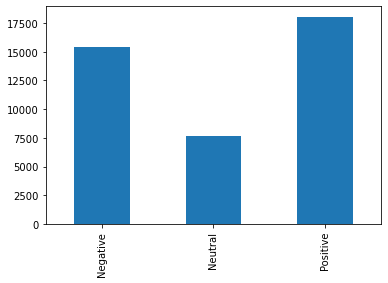

In [10]:
x = train_clean_lemmas.Sentiment.value_counts()[["Negative", "Neutral", "Positive"]].plot(kind = "bar")

### 6. Graphically summarize the length of the text of the `Tweet_texts` using
+ boxplot
+ histogram
+ density plot

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot(title, data):
    # create a plot with three subplots and the given title
    fig, axes = plt.subplots(1, 3, figsize = (20, 6))
    fig.suptitle(title, fontsize = 18)

    # create a boxplot given the data
    sns.boxplot(ax = axes[0], x = data)
    axes[0].set_title("Boxplot", fontsize = 14)

    # create a histogram given the data
    sns.histplot(ax = axes[1], data = data)
    axes[1].set_title("Histogram", fontsize = 14)

    # create a density plot given the data
    sns.kdeplot(ax = axes[2], data = data)
    x = axes[2].set_title("Density Plot", fontsize = 14)

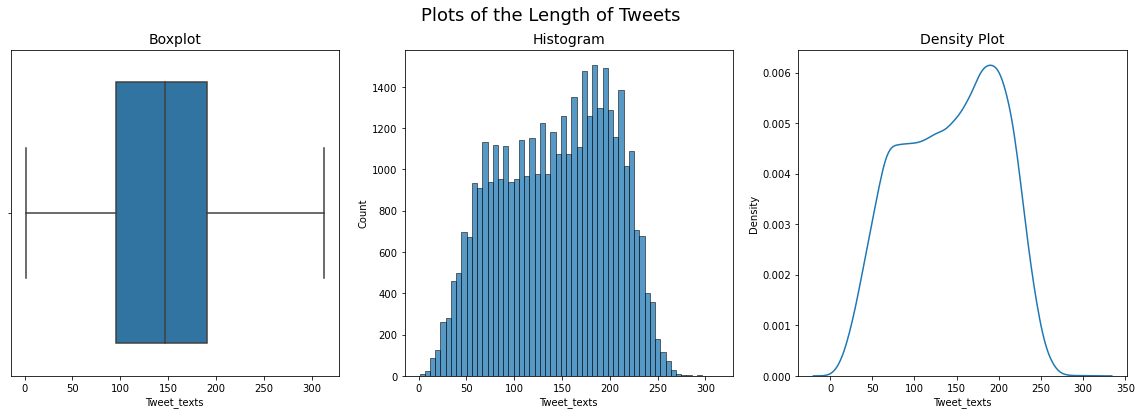

In [12]:
plot("Plots of the Length of Tweets", train_clean_lemmas.Tweet_texts.str.len())

### 7. Graphically summarize the word count of the text of the `Tweet_texts` using
+ boxplot
+ histogram
+ density plot

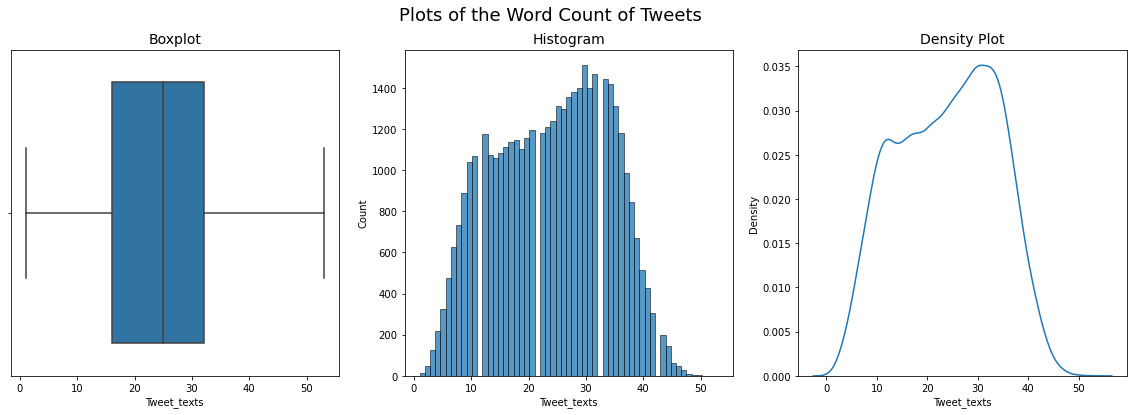

In [13]:
plot("Plots of the Word Count of Tweets", train_clean_lemmas.Tweet_texts.str.split().str.len())

### 8. Graphically summarize the top 10 unigram and bigrams of the tf-idf of the text of the `Tweet_texts`.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_tf_idf_words(data, use_idf, ngram_range, top_n):
    # create a TfidfVectorizer object
    tf_idf = TfidfVectorizer(stop_words = "english", ngram_range = ngram_range, use_idf = use_idf)
    
    # fit and transform the corpus and generate the tf-idf matrix
    tf_idf_sparse_matrix = tf_idf.fit_transform(data)
    # extract the feature names
    feature_names = np.array(tf_idf.get_feature_names())
    
    # rank the tf-idf matrix by tf-idf values and return the indices of the top_n values
    sorted_idx = np.argsort(tf_idf_sparse_matrix.data)[:-(top_n+1):-1]
    
    # return the feature names and corresponding tf_idf values in a DataFrame
    return pd.DataFrame(
    {'feature': feature_names[tf_idf_sparse_matrix.indices[sorted_idx]], 
     'tf_idf': tf_idf_sparse_matrix.data[sorted_idx]
    })

top_n = 10
# find the top 10 tf-idf unigrams
top_unigrams_df = get_top_tf_idf_words(train_clean_lemmas.Tweet_texts, True, (1,1), top_n)
# find the top 10 tf-idf bigrams
top_bigrams_df = get_top_tf_idf_words(train_clean_lemmas.Tweet_texts, True, (2,2), top_n)

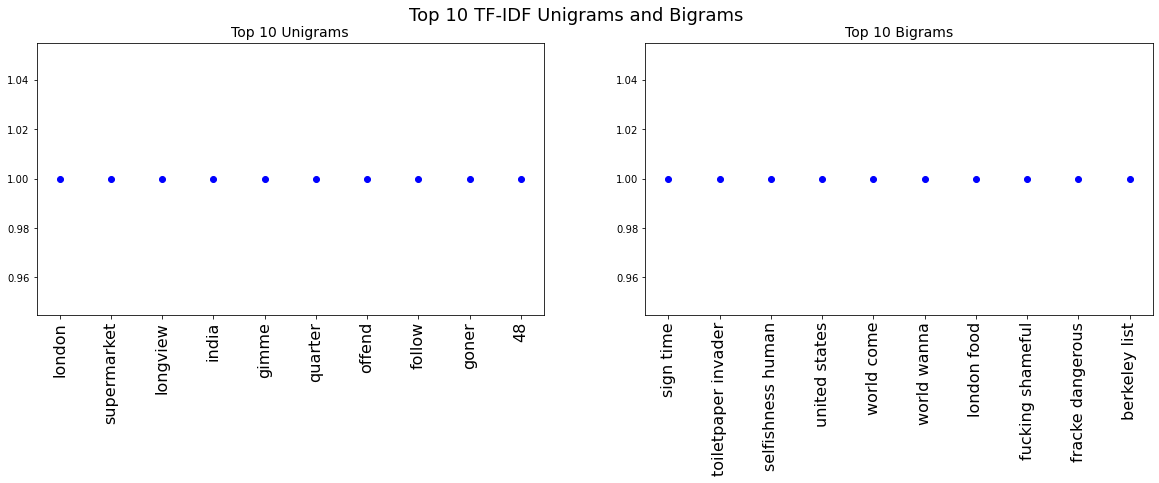

In [15]:
x = range(0, top_n)

# create a plot with 2 subplots (one for top unigrams and one for top bigrams)
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle("Top 10 TF-IDF Unigrams and Bigrams", fontsize = 18)

# plot the top 10 tf-idf unigrams
ax[0].plot(x, top_unigrams_df.tf_idf, "bo")
ax[0].set_title("Top 10 Unigrams", fontsize = 14)
ax[0].set_xticks(x)
x_ticks_labels = top_unigrams_df.feature
ax[0].set_xticklabels(x_ticks_labels, rotation = "vertical", fontsize = 16)

# plot the top 10 tf-idf bigrams
ax[1].plot(x, top_bigrams_df.tf_idf, "bo")
ax[1].set_title("Top 10 Bigrams", fontsize = 14)
ax[1].set_xticks(x)
x_ticks_labels = top_bigrams_df.feature
ax[1].set_xticklabels(x_ticks_labels, rotation = "vertical", fontsize = 16)

fig.subplots_adjust(hspace = 1.5)
plt.show()

### 9. Visualize the top 10 term frequency of the tokens associated with positive tweets using scattertext.

In [16]:
import scattertext as st

# generate corpus for texts
corpus = st.CorpusFromPandas(train_clean_lemmas, category_col = "Sentiment", text_col = "Tweet_texts", nlp = nlp).build()

# create term frequency DataFrame
term_freq_df = corpus.get_term_freq_df()

# sort the term frequency DataFrame by "Positive freq" and select the top 10 terms
top_term_df_freq = term_freq_df.sort_values(by = "Positive freq", ascending = False).head(top_n)

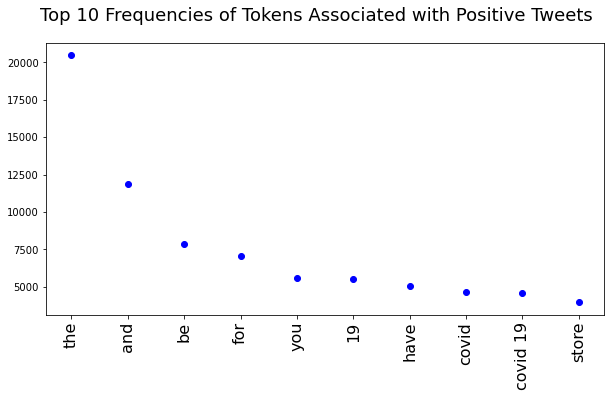

In [17]:
x = range(0, top_n)
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
fig.suptitle("Top 10 Frequencies of Tokens Associated with Positive Tweets", fontsize = 18)

# plot the top 10 tokens (according to frequency) associated with positive tweets
ax.plot(x, top_term_df_freq["Positive freq"], "bo")
ax.set_xticks(x)
x_ticks_labels = top_term_df_freq.index
x = ax.set_xticklabels(x_ticks_labels, rotation = "vertical", fontsize = 16)

### 10. Visualize the top 10 positive scores of the tokens associated with positive tweets using scattertext.

In [18]:
# add "Positive score" to the term frequency DataFrame
term_freq_df["Positive score"] = corpus.get_scaled_f_scores("Positive")

# sort the term frequency DataFrame by "Positive score" and select the top 10 terms
top_term_df_score = term_freq_df.sort_values(by = "Positive score", ascending = False).head(top_n)

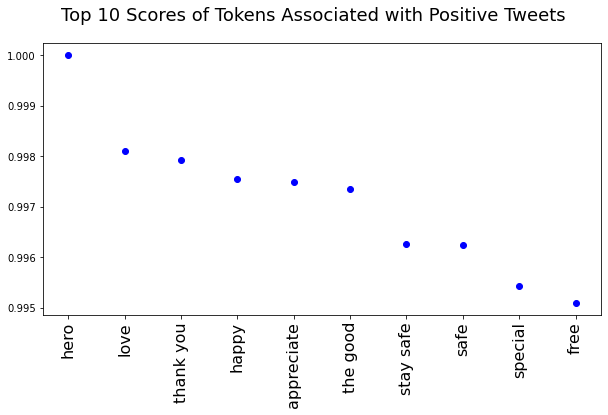

In [19]:
x = range(0, top_n)
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
fig.suptitle("Top 10 Scores of Tokens Associated with Positive Tweets", fontsize = 18)

# plot the top 10 tokens (according to score) associated with positive tweets
ax.plot(x, top_term_df_score["Positive score"], "bo")
ax.set_xticks(x)
x_ticks_labels = top_term_df_score.index
x = ax.set_xticklabels(x_ticks_labels, rotation = "vertical", fontsize = 16)

### 11. Convert the column of the `Tweet_texts` to a matrix of token counts using `CountVectorizer` and unigrams and bigrams.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# create a CountVectorizer object
tf_vectorizer = CountVectorizer(ngram_range = (1, 2))
# generate the term frequency document word matrix
tf_matrix = tf_vectorizer.fit_transform(train_clean_lemmas.Tweet_texts)

In [21]:
len(tf_vectorizer.vocabulary_) # size of the vocabulary

397695

In [22]:
tf_matrix.shape # shape of the document word matrix

(41142, 397695)

### 12. Perform the tf-idf analysis on the column of the `Tweet_texts` using `TfidfVectorizer`.

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

# create a TfidfVectorizer object
tf_idf_vectorizer = TfidfVectorizer()
# generate the term frequency-inverse document frequency document word matrix
tf_idf_matrix = tf_idf_vectorizer.fit_transform(train_clean_lemmas.Tweet_texts)

In [24]:
len(tf_idf_vectorizer.vocabulary_) # size of the vocabulary

32392

In [25]:
tf_idf_matrix.shape # shape of the document word matrix

(41142, 32392)

### 13. Find the cosine similarity in `Tweet_texts` between the 200th and 20,000th tweets.

In [26]:
# load the large spacy model
nlp = spacy.load("en_core_web_lg")

# extract the 200th and 20,000th tweets
tweet_200 = train_clean_lemmas.Tweet_texts[199]
tweet_20000 = train_clean_lemmas.Tweet_texts[19999]

# create nlp objects for the two tweets
doc_200 = nlp(tweet_200)
doc_20000 = nlp(tweet_20000)

# compute the similarity between the documents
print(f"The cosine similarity between '{doc_200}' and '{doc_20000}' is {doc_200.similarity(doc_20000):.2f}.")

The cosine similarity between 'cambridge our retail store will close through the end march be do this keep our staff and customer safe during the covid 19 crisis will continue fulfill and ship out order place online pickup will not available until return regular hour' and 'don you understand that presently fight with covid 19 more important than oil price don know why you people be irresponsible you just oppose from bjp have you see how manage the fight agai' is 0.87.


### 14. Find the corpus vector equal to the average of all the document vectors, where each document corresponds to a tweet or a row in this dataset.

In [27]:
# join all the tweets into one string
tweets_all_joined = " ".join(train_clean_lemmas.Tweet_texts)

# limit the tweets string to the first 1,000,000 characters to convert it to an nlp object
doc = nlp(tweets_all_joined[0:999999])

# find the corpus vector (for the first 1,000,000 characters)
doc.vector

array([-8.44927745e-02,  1.31048140e-01, -8.58406795e-02, -3.68056394e-02,
        1.01684545e-01, -3.63935064e-02, -3.29607763e-02, -6.47273613e-02,
        3.64228686e-02,  2.04257662e+00, -2.66146283e-01, -1.28315718e-02,
        3.98853576e-02, -5.11489416e-02, -9.42547310e-02, -6.31809337e-02,
       -9.12568475e-02,  1.09161933e+00, -1.17884344e-01,  3.07426154e-02,
        3.59169092e-03,  1.85537573e-02, -3.21119982e-03, -7.01706257e-02,
       -2.43057526e-02,  2.28184738e-02, -9.63638676e-02, -6.90200826e-02,
        3.98982438e-02, -4.28708797e-02, -5.86367450e-02,  2.23219997e-02,
        1.83230907e-04,  3.07286968e-02,  6.26555858e-02,  1.78494802e-02,
        8.68381738e-03,  1.67538677e-02, -2.09831929e-02, -5.94926246e-03,
       -3.79779221e-02,  3.84888090e-02,  3.74027088e-02, -6.16460014e-02,
        3.86740931e-03,  5.85700946e-02, -1.04546083e-01, -1.06615018e-02,
        1.06820516e-02,  3.00133502e-02, -5.37866221e-02, -2.03211089e-02,
        4.40821974e-02, -

### For steps 15 to 20, we want to forecast `Sentiment` using `Tweet_texts`.

### 15. Build the first model based on the training dataset using the random forests and pipeline.

In [28]:
seed = 100

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

t0_model_1 = time.time()

# build a pipeline containing a vectorizer (TfidfVectorizer) and a classifier (RandomForestClassifier)
pipeline_model_1 = Pipeline([("vectorizer", TfidfVectorizer()),
                             ("classifier", RandomForestClassifier(random_state = seed))])
# fit the pipeline using the training data
pipeline_model_1.fit(train_clean_lemmas.Tweet_texts, train_clean_lemmas.Sentiment)

print(find_time_elapsed(t0_model_1))

time elapsed = 1.58326 minutes


### 16. Check the first model on the test dataset. Is it a good model based on the selected evaluation metrics? Please justify your answer.

This model has classification difficulties when the true label is neutral as it misclassifies 22% of neutrals as negatives and 32% of neutrals as positives.  The model only correctly classifies 46% of neutrals while it correctly classifies 67% of negatives and 81% of positives.  Additionally, the misclassified negatives are largely classified as positives, and the misclassified positives are largely classified as negatives.

The accuracy for this model is somewhat misleading because neutrals are underrepresented in the test dataset.  The accuracy of the overall model is almost 70% while the accuracy for the neutrals is only 46%. 

In [30]:
# find the accuracy of the model (use the test data)
print("accuracy =", round(pipeline_model_1.score(test_clean_lemmas.Tweet_texts, test_clean_lemmas.Sentiment), 5))

accuracy = 0.69142


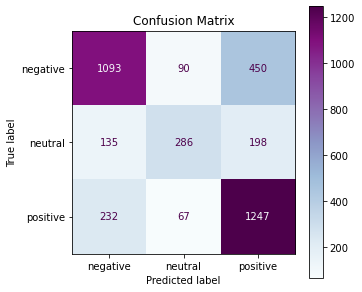

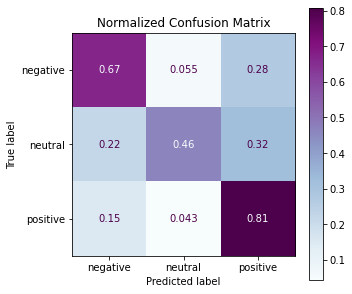

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy

def plot_confusion_matrix(pipeline, X_test, y_test):
    target_names = ["negative", "neutral", "positive"]
    titles_options = [("Confusion Matrix", None), ("Normalized Confusion Matrix", "true")]

    for title, normalize in titles_options:
        # generate the predictions using the test data
        predictions = pipeline.predict(X_test)
        
        # create a confusion matrix using the true values and the predictions
        cm = confusion_matrix(y_test, predictions, labels = pipeline.classes_, normalize = normalize)
        cmp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_names)

        fig, ax = plt.subplots(figsize = (5, 5))
        cmp.plot(ax = ax, cmap = "BuPu")
        ax.set_title(title)

# plot a confusion matrix for the model (use the test data)
plot_confusion_matrix(pipeline_model_1, test_clean_lemmas.Tweet_texts, test_clean_lemmas.Sentiment)

### 17. Create the second model using random forest, pipeline, grid search CV for the hyperparameters for the estimators. (Please see all the potential parameters at Scikit Learn's https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html and https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [32]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# build a pipeline containing a vectorizer (TfidfVectorizer) and a classifier (RandomForestClassifier)
pipeline_model_2 = Pipeline([("vectorizer", TfidfVectorizer()),
                             ("classifier", RandomForestClassifier(random_state = seed))])

parameters = {
    "vectorizer__stop_words": (None, "english"),
    "vectorizer__max_df": (0.33, 0.66, 1),
    "classifier__min_samples_split": (2, 4),
    "classifier__min_samples_leaf": (1, 2, 4)
}

grid_search_cv = GridSearchCV(pipeline_model_2, parameters, n_jobs = -1, verbose = 1, cv = 4)

### 18. Tune the second model and perform model diagnostics on the test dataset. Is it a good model? Please justify your answer.

The best model is the random forest classification model with `min_samples_leaf` = 2 and `min_samples_split` = 2.  The best parameters for the tf-idf vectorizer are `max_df` = 0.33 and `stop_words` = "english".

The accuracy for this model (about 73%) is a slight improvement compared to the first model (about 69%), but this model struggles with classifying neutrals like the first model.  The accuracy for neutrals is only 48% while the accuracy for negatives is 73% and the accuracy for positives is 84%.

In [33]:
t0_model_2 = time.time()

# print the pipeline and the possible parameters
print("pipeline:", [name for name, _ in pipeline_model_2.steps])
print("\npossible parameters:")
pprint(parameters)
print("\n")

# fit the grid search on the training data
grid_search_cv.fit(train_clean_lemmas.Tweet_texts, train_clean_lemmas.Sentiment)

# find the best model (accuracy and parameters)
print("\nbest accuracy =", round(grid_search_cv.best_score_, 5))
print("\nbest parameters:")
best_parameters = grid_search_cv.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    
print("\n" + find_time_elapsed(t0_model_2))

pipeline: ['vectorizer', 'classifier']

possible parameters:
{'classifier__min_samples_leaf': (1, 2, 4),
 'classifier__min_samples_split': (2, 4),
 'vectorizer__max_df': (0.33, 0.66, 1),
 'vectorizer__stop_words': (None, 'english')}


Fitting 4 folds for each of 36 candidates, totalling 144 fits

best accuracy = 0.72947

best parameters:
	classifier__min_samples_leaf: 2
	classifier__min_samples_split: 2
	vectorizer__max_df: 0.33
	vectorizer__stop_words: 'english'

time elapsed = 22.59774 minutes


In [34]:
# find the accuracy of the model (use the test data)
print("accuracy =", round(grid_search_cv.score(test_clean_lemmas.Tweet_texts, test_clean_lemmas.Sentiment), 5))

accuracy = 0.73354


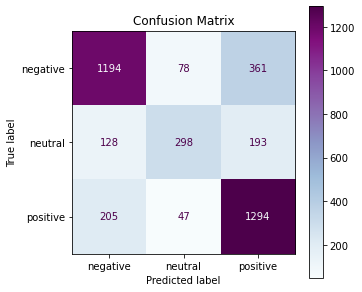

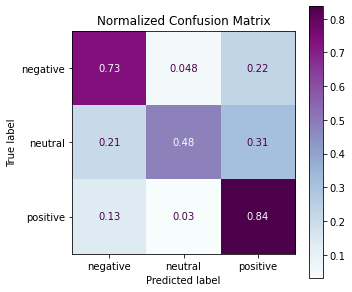

In [35]:
# plot a confusion matrix for the model (use the test data)
plot_confusion_matrix(grid_search_cv, test_clean_lemmas.Tweet_texts, test_clean_lemmas.Sentiment)

### 19. Build the third model using pipeline, grid search CV, hyperparameter for the following classifiers:
+ Logistic Regression
+ Support Vector Machine
+ Random Forest

In [36]:
from sklearn.base import BaseEstimator
from sklearn.svm import SVC

class ClfSwitcher(BaseEstimator):
    def __init__(self, estimator = SVC()):
        self.estimator = estimator

    def fit(self, X, y = None, **kwargs):
        self.estimator.fit(X, y)
        return self

    def predict(self, X, y = None):
        return self.estimator.predict(X)

    def predict_proba(self, X):
        return self.estimator.predict_proba(X)

    def score(self, X, y):
        return self.estimator.score(X, y)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# build a pipeline containing a vectorizer (TfidfVectorizer) and a classifier (ClfSwitcher)
# for the vectorizer, use the best parameters found in the previous model
pipeline_model_3 = Pipeline([("vectorizer", TfidfVectorizer(stop_words = best_parameters["vectorizer__stop_words"],
                                                            max_df = best_parameters["vectorizer__max_df"])),
                             ("classifier", ClfSwitcher())]) 

parameters = [
    # LogisticRegression parameters
    {
        "classifier__estimator": [LogisticRegression(random_state = seed)],
        "classifier__estimator__penalty": ["l2", "none"],
    },
    # SVC parameters
    {
        "classifier__estimator": [SVC(random_state = seed)],
        "classifier__estimator__C": (0.5, 1, 2),
        "classifier__estimator__kernel": ["linear", "rbf"],
    },
    # RandomForestClassifier parameters
    {
        "classifier__estimator": [RandomForestClassifier(random_state = seed)],
        "classifier__estimator__min_samples_split": (2, 4),
        "classifier__estimator__min_samples_leaf": (1, 2)
    },
]

grid_search_cv_2 = GridSearchCV(pipeline_model_3, parameters, cv = 4, n_jobs = -1, return_train_score = False, verbose = 3) 

### 20. Tune the third model and perform model diagnostics on the test dataset. Is it a good model? Please justify your answer.

The best model is the Support Vector Classification model with `C` = 2 and `kernel` = "linear".

This model is a good model.  Not only is its overall accuracy an improvement over the first two models, but its accuracy for neutrals is a dramatic improvement compared to these models.  This model correctly classifies 81% of negatives, 69% of neutrals, and 84% of positives.

Additionally, in this model compared to the first two models, the misclassification of negatives is more evenly spread between neutrals and positives, and the misclassification of positives is more evenly spread between neutrals and negatives.

In [38]:
t0_model_3 = time.time()

# print the pipeline and the possible parameters
print("pipeline:", [name for name, _ in pipeline_model_3.steps])
print("\npossible parameters:")
pprint(parameters)
print("\n")

# fit the grid search on the training data
grid_search_cv_2.fit(train_clean_lemmas.Tweet_texts, train_clean_lemmas.Sentiment)

# find the best model (accuracy and parameters)
print("\nbest accuracy =", round(grid_search_cv_2.best_score_, 5))
best_parameters = grid_search_cv_2.best_estimator_.get_params()
all_classifiers = []
for parameter in parameters:
    all_classifiers.append(parameter["classifier__estimator"])
all_classifiers = [str(alg) for clf in all_classifiers for alg in clf]
print("\nbest_parameters:")
idx = all_classifiers.index(str(best_parameters["classifier__estimator"]))
for param_name in sorted(parameters[idx].keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print("\n" + find_time_elapsed(t0_model_3))

pipeline: ['vectorizer', 'classifier']

possible parameters:
[{'classifier__estimator': [LogisticRegression(random_state=100)],
  'classifier__estimator__penalty': ['l2', 'none']},
 {'classifier__estimator': [SVC(random_state=100)],
  'classifier__estimator__C': (0.5, 1, 2),
  'classifier__estimator__kernel': ['linear', 'rbf']},
 {'classifier__estimator': [RandomForestClassifier(random_state=100)],
  'classifier__estimator__min_samples_leaf': (1, 2),
  'classifier__estimator__min_samples_split': (2, 4)}]


Fitting 4 folds for each of 12 candidates, totalling 48 fits

best accuracy = 0.7853

best_parameters:
	classifier__estimator: SVC(C=2, kernel='linear', random_state=100)
	classifier__estimator__C: 2
	classifier__estimator__kernel: 'linear'

time elapsed = 1.11831 hours


In [39]:
# find the accuracy of the model (use the test data)
print("accuracy =", round(grid_search_cv_2.score(test_clean_lemmas.Tweet_texts, test_clean_lemmas.Sentiment), 5))

accuracy = 0.80437


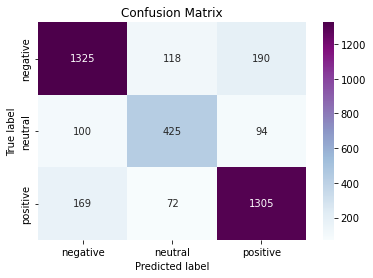

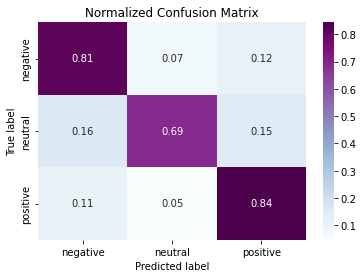

In [47]:
# plot a confusion matrix for the model (use the test data)
target_names = ["negative", "neutral", "positive"]
titles_options = [("Confusion Matrix", None), ("Normalized Confusion Matrix", "true")]
for title, normalize in titles_options:
    ax = plt.axes() 
    predictions = grid_search_cv_2.predict(test_clean_lemmas.Tweet_texts)
    cm = confusion_matrix(test_clean_lemmas.Sentiment, predictions, normalize = normalize)
    if normalize:
        sns.heatmap(cm, annot = True, fmt = ".2f", xticklabels = target_names, yticklabels = target_names, cmap = "BuPu")
    else:
        sns.heatmap(cm, annot = True, fmt = ".0f", xticklabels = target_names, yticklabels = target_names, cmap = "BuPu")
    ax.set_title(title)
    plt.xlabel("Predicted label") 
    plt.ylabel("True label")
    plt.show()

### For Q21 to Q25, please only work on the training dataset.

### 21. Generate the first topic model by setting five topics using LDA method and `CountVectorizer`.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# create a CountVectorizer object
tf_vectorizer = CountVectorizer(stop_words = "english")
# fit and transform the corpus and generate the document word matrix
document_word_matrix_tf = tf_vectorizer.fit_transform(train_clean_lemmas.Tweet_texts)

# create a LatentDirichletAllocation object
lda = LatentDirichletAllocation(n_components = 5, random_state = seed)
# fit the document word matrix
lda.fit(document_word_matrix_tf)

LatentDirichletAllocation(n_components=5, random_state=100)

### 22. Plot the top 15 words for each topic for the model above.

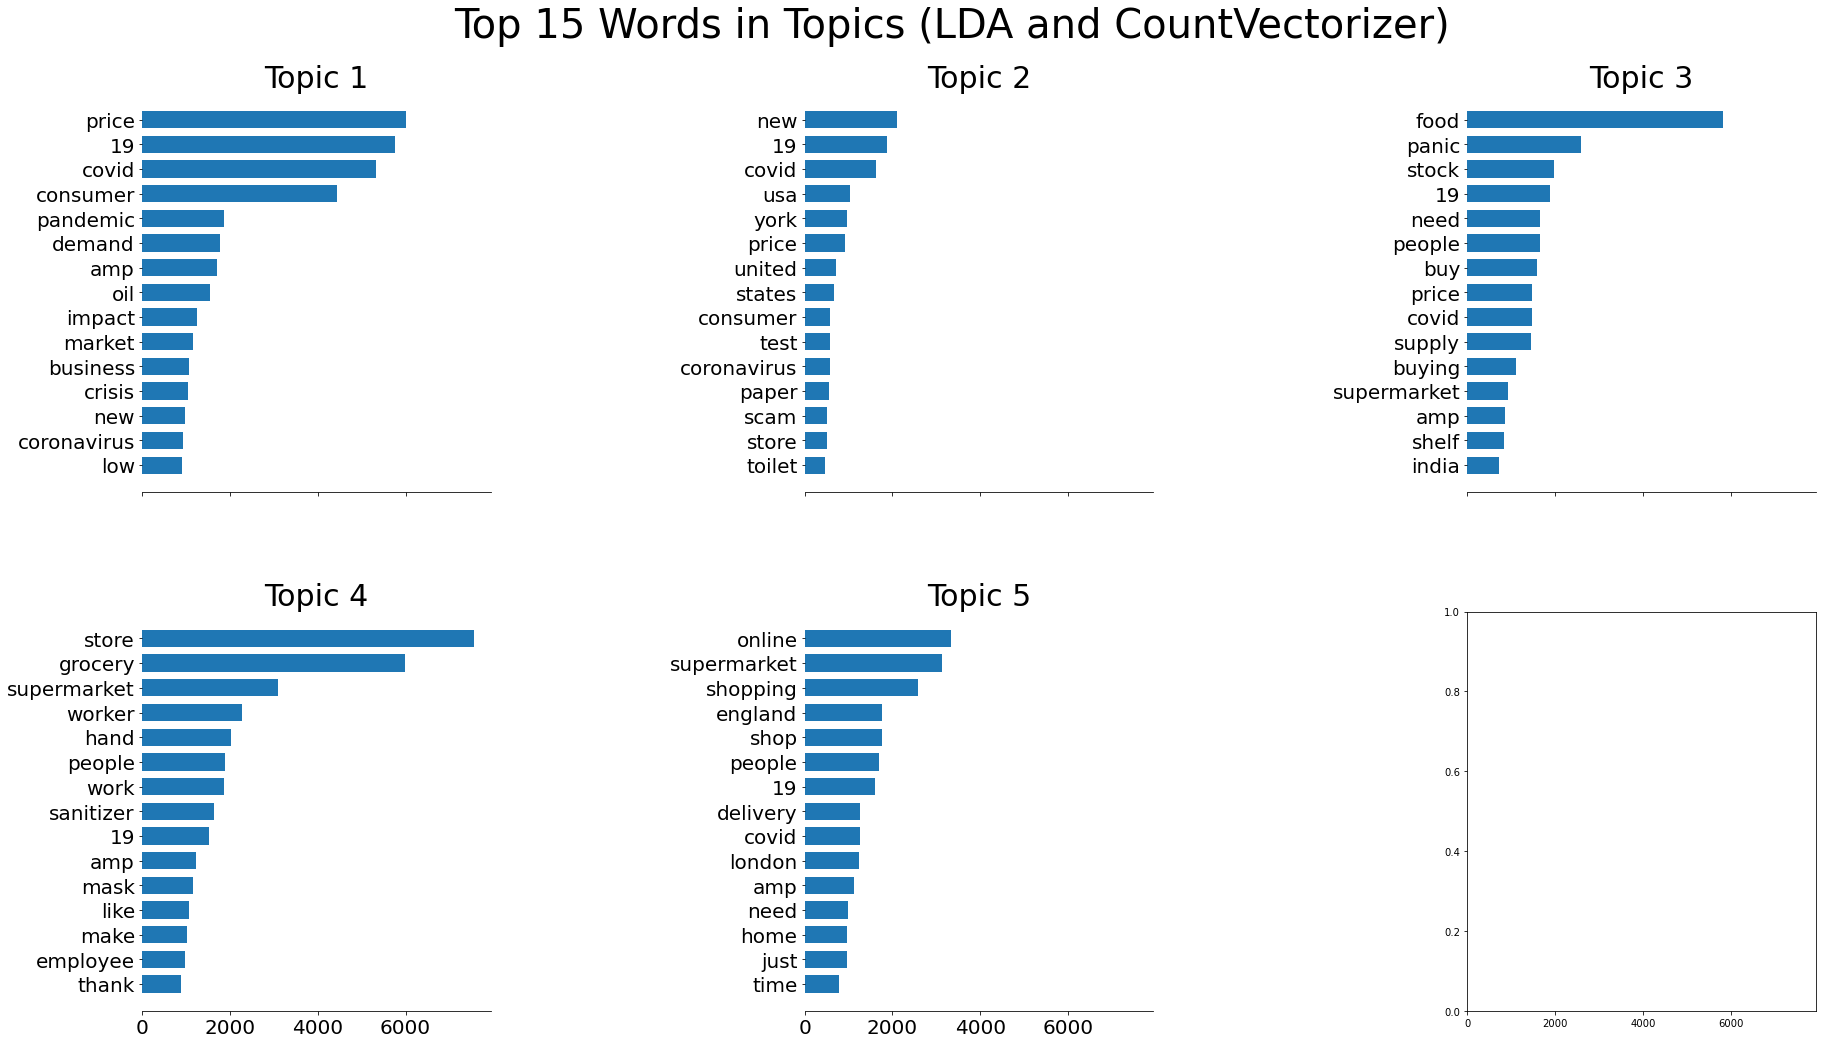

In [42]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    # create 6 subplots (2 rows and 3 columns of plots)
    # we have 5 topics, so 1 of the 6 subplots will be blank
    fig, axes = plt.subplots(2, 3, figsize = (30, 15), sharex = True)
    # flatten the axes so that we can loop through the plots without using nested loops
    axes = axes.flatten()
    
    # loop over the 5 topics
    for topic_idx, topic in enumerate(model.components_):
        # rank the values and take out the indices corresponding to the top values
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        # extract the top features using the top indices
        top_features = [feature_names[i] for i in top_features_ind]
        # extract the weights using the top indices
        weights = topic[top_features_ind]
        
        # extract the axes of the subplot
        ax = axes[topic_idx]
        # create a horizontal bar plot
        ax.barh(top_features, weights, height = 0.7) 
        ax.set_title(f"Topic {topic_idx + 1}", fontdict = {"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis = "both", which = "major", labelsize = 20)
        # remove the top, right, and left axis from the plot
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top = 0.90, bottom = 0.05, wspace = 0.90, hspace = 0.3)
    plt.show()

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, 15, "Top 15 Words in Topics (LDA and CountVectorizer)")

### 23. Generate the second topic model by setting five topics using LDA method and `TfidfVectorizer`.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create a TfidfVectorizer object
tf_idf_vectorizer = TfidfVectorizer(stop_words = "english")
# fit and transform the corpus and generate the document word matrix
document_word_matrix_tf_idf = tf_idf_vectorizer.fit_transform(train_clean_lemmas.Tweet_texts) 

# create a LatentDirichletAllocation object
lda_tf_idf = LatentDirichletAllocation(n_components = 5, random_state = seed)
# fit the document word matrix
lda_tf_idf.fit(document_word_matrix_tf_idf)

LatentDirichletAllocation(n_components=5, random_state=100)

### 24. Plot the top 15 words for each topic for the second model above.

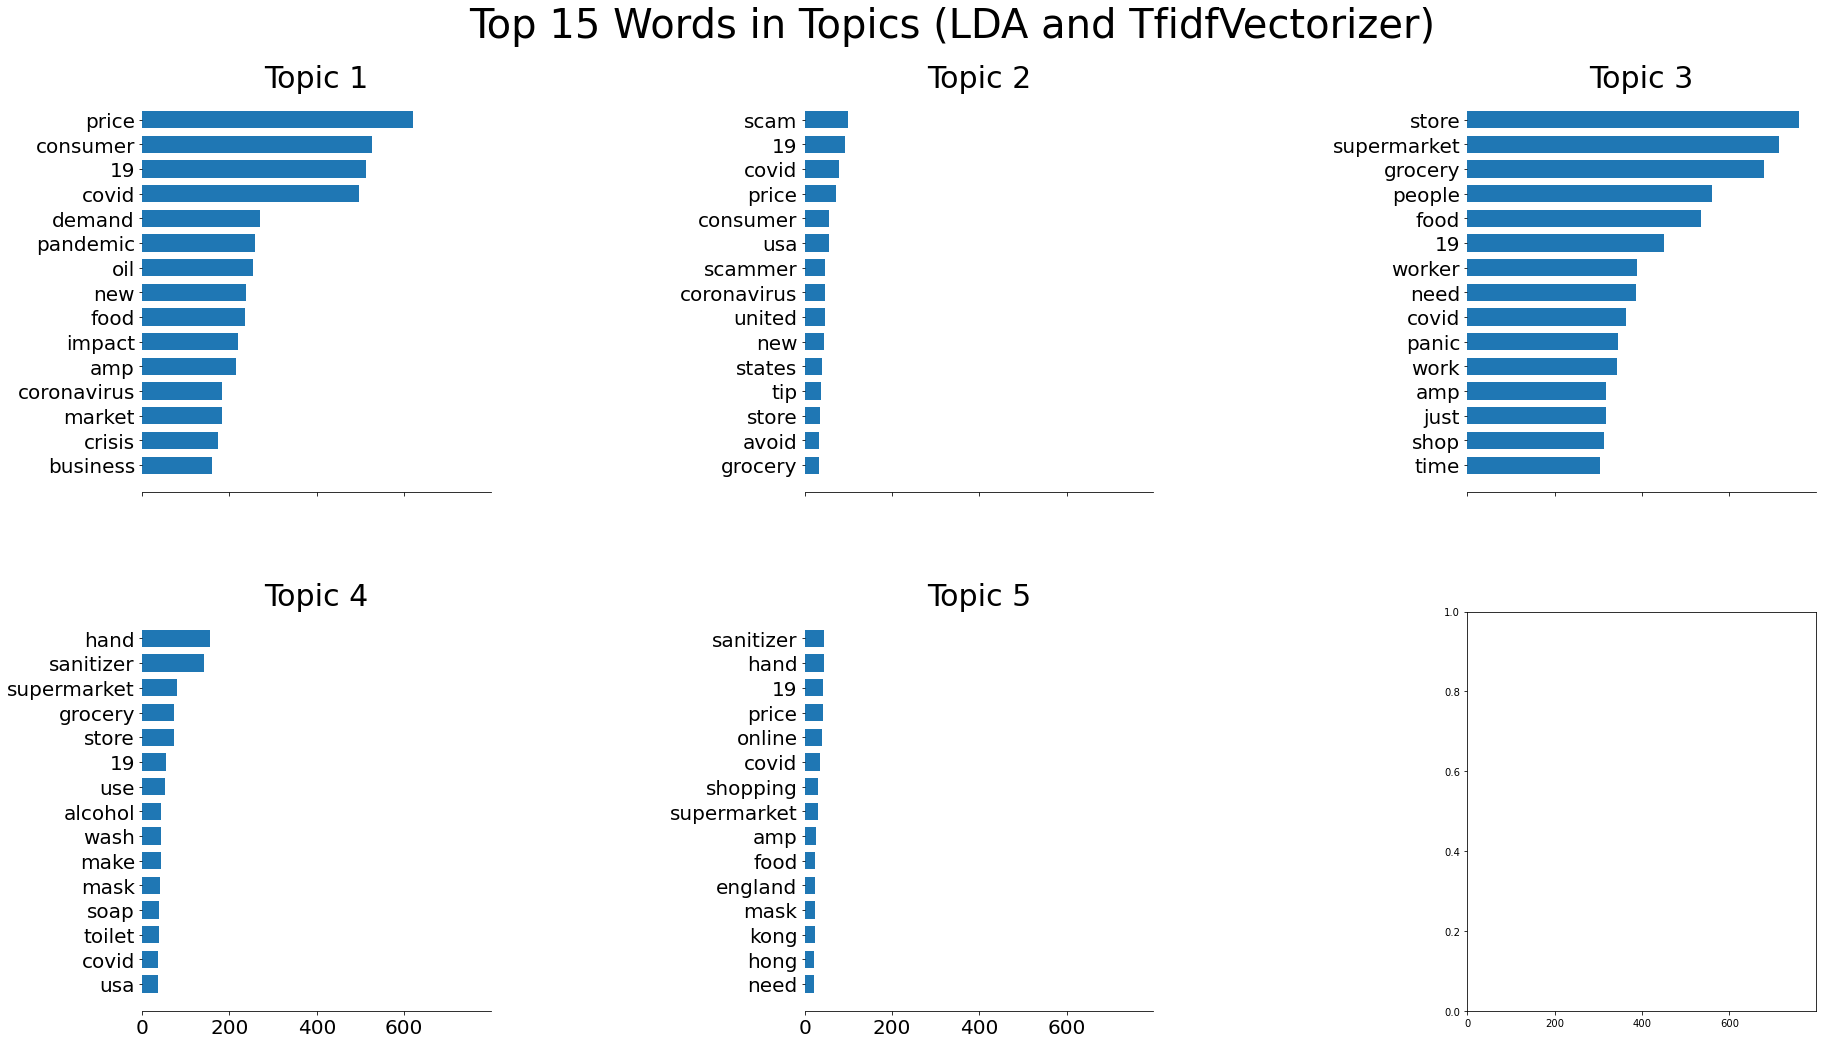

In [44]:
tf_idf_feature_names = tf_idf_vectorizer.get_feature_names_out()
plot_top_words(lda_tf_idf, tf_idf_feature_names, 15, "Top 15 Words in Topics (LDA and TfidfVectorizer)")

### 25. Visualize the second topic model using the dimension reduction method.

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

# visualize the second topic model (which uses LDA and TfidfVectorizer)
pyLDAvis.sklearn.prepare(lda_model = lda_tf_idf, dtm = document_word_matrix_tf_idf, vectorizer = tf_idf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.114076 -0.094259       1        1  42.983149
0     -0.118667  0.091149       2        1  30.496771
3      0.076371 -0.066680       3        1   9.306610
1      0.070462  0.054342       4        1   9.258658
4      0.085911  0.015448       5        1   7.954812, topic_info=              Term        Freq       Total Category  logprob  loglift
13602         hand  351.000000  351.000000  Default  30.0000  30.0000
7655      consumer  532.000000  532.000000  Default  29.0000  29.0000
25339    sanitizer  325.000000  325.000000  Default  28.0000  28.0000
27885  supermarket  724.000000  724.000000  Default  27.0000  27.0000
22980        price  782.000000  782.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
21990       people   13.572424  581.908504   Topic5  -6.7532  -1.2269
25484          say   12.207400  287.948450   Topic5  -6.8592  -0.6293
14317         home   12.029867  318.357997   Topic5  -6.8738  -0.7444
21577     pandemic   11.598140  344.922456   Topic5  -6.9104  -0.8611
28845         time   11.614820  387.200812   Topic5  -6.9089  -0.9753

[400 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
493        1  0.392491         19
493        2  0.448261         19
493        3  0.045247         19
493        4  0.077867         19
493        5  0.035777         19
...      ...       ...        ...
31924      2  0.496995       york
31924      3  0.030742       york
31924      4  0.087102       york
31924      5  0.015371       york
31929      1  0.950551  yorkshire

[834 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2, 5])

In [46]:
print("total", find_time_elapsed(t0)) # final time

total time elapsed = 1.76316 hours
